In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.backtracking import backtracking

In [2]:
def func(x, beta=1.0):
    assert len(x) == 2, "Input must be a 2-dimensional vector."
    x1, x2 = x[0], x[1]
    f = x1**2 + beta * x2**2
    return f

In [ ]:
def solve_exercise(beta_value):
    N = 200
    beta = beta_value # change to value of interest
    x1 = np.linspace(-5, 12, N)
    x2 = np.linspace(-6, 6, N)
    X1, X2 = np.meshgrid(x1, x2, indexing='ij')
    F = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            F[i, j] = func([X1[i, j], X2[i, j]], beta)
    Nlev = 15


    xmin, xhist = backtracking(func, [10, 4], beta, tol=1e-6, maxIter=5000)

    plt.figure()
    plt.contourf(X1, X2, F, levels=Nlev, cmap='viridis')
    plt.contour(X1, X2, F, levels=Nlev, colors='k', linewidths=0.3)
    plt.gca().set_aspect('equal', adjustable='box')

    lstyles = ['r--o', 'w--^']
    isol = 0
    for ix in range(len(xhist)):
        xcurr = xhist[ix]
        if ix == 0:
            plt.plot(xcurr[0], xcurr[1], lstyles[isol])
            plt.text(xcurr[0], xcurr[1], 'Start', color='red', fontsize=16, verticalalignment='bottom', horizontalalignment='right')
        else:
            xprev = xhist[ix - 1]
            plt.plot([xprev[0], xcurr[0]], [xprev[1], xcurr[1]], lstyles[isol])

    plt.title(r'$\beta=%.1f, \quad N_{\rm iter}=%i$' % (beta, len(xhist)))

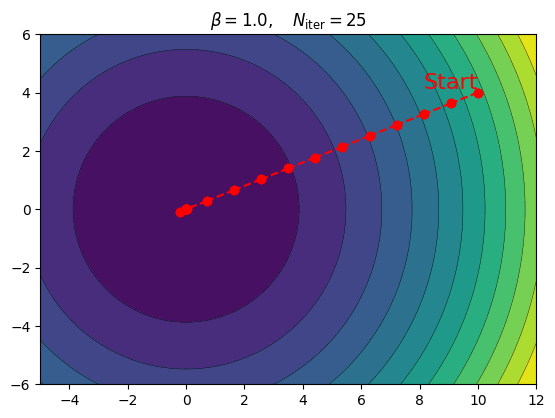

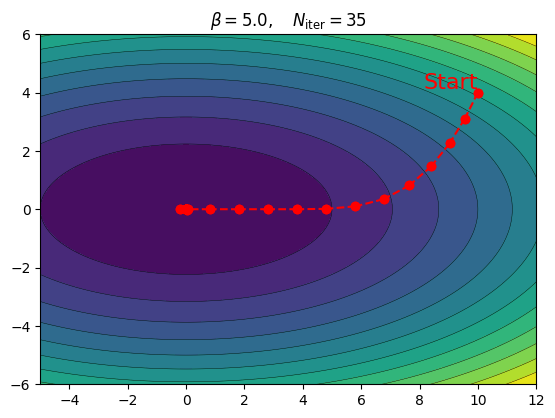

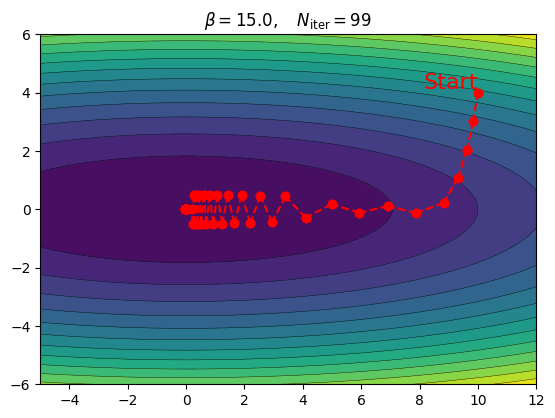

In [4]:
solve_exercise(beta_value=1.0)
solve_exercise(beta_value=5.0)
solve_exercise(beta_value=15.0)